## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2025, Prof. J.C. Kao, TAs: B. Qu, K. Pang, S. Dong, S. Rajesh, T. Monsoor, X. Yan

In [152]:
import numpy as np 
import matplotlib.pyplot as plt


#allows matlab plots to be generated in line
%matplotlib inline

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x + 2x^2 -3x^3 + \epsilon$

Text(0, 0.5, '$y$')

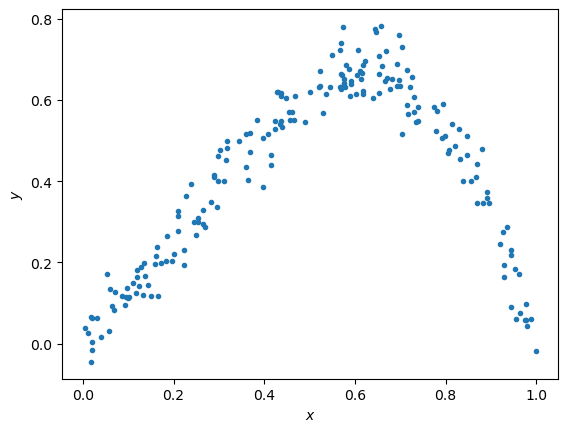

In [154]:
np.random.seed(0)  # Sets the random seed. 

num_train = 200     # Number of training data points



# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))

# torch.rand(array size)
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.05, size=(num_train,))
# torch.normal(mean, std, size)
f = plt.figure()
ax = f.gca()
ax.plot(x,y,".")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?


(2) What is the distribution of the additive noise $\epsilon$?


### ANSWERS:

(1) uniform distribution with range between 0 and 1.

(2) normal distribution with mean = 0, standard deviation = 1

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [156]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))


# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]


#print(xhat.shape)
# the xhat matrix is [[x],[1]] so the formula for theta = inv(transpose(X)* X) * xhat * y 

#theta = np.zeros(2) # please modify this line

theta = np.linalg.inv(xhat@xhat.T) @ xhat @ y
# theta = np.linalg.inv(xhat.T@xhat) @ xhat.T@y
# this formula is usual form when xhat is [ones, X] column wise. 

# ================== #
# END YOUR CODE HERE #
# ================== #

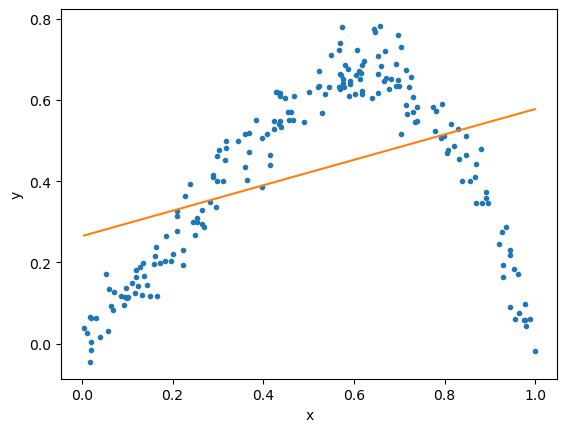

In [158]:
# plot for data
f = plt.figure()
ax = f.gca()
ax.plot(x,y,".")
ax.set_xlabel("x")
ax.set_ylabel("y")

# plot for model.
xs = np.linspace(min(x),max(x),num = 50)
xs = np.vstack((xs,np.ones_like(xs)))
plt.plot(xs[0,:],np.dot(xs.T,theta))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) linear model does underfitting 

(2) instead of ax + b, $y =ax^3 + bx^2 + cx + d +  \epsilon$ or $y = ax^2 + bx + c + \epsilon$

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [160]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
   
for i in range(N):
    xhat = np.vstack([x**j for j in range(i+1, -1,-1)])
    xhats.append(xhat)
    theta = np.linalg.inv(xhat@xhat.T)@xhat@y
    thetas.append(theta)


# ================== #
# END YOUR CODE HERE #
# ================== #

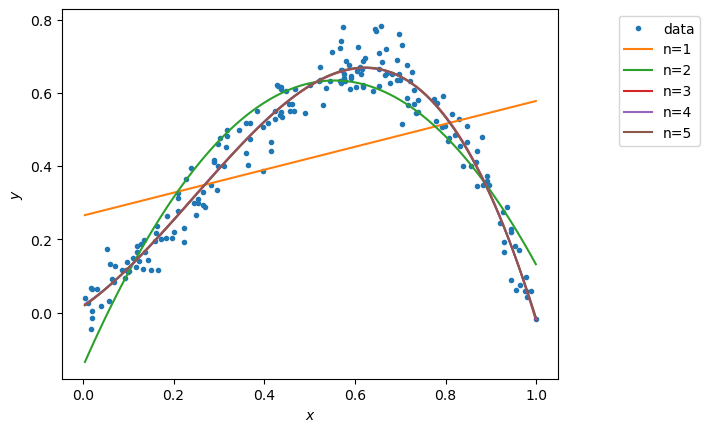

In [162]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),100), np.ones(100)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

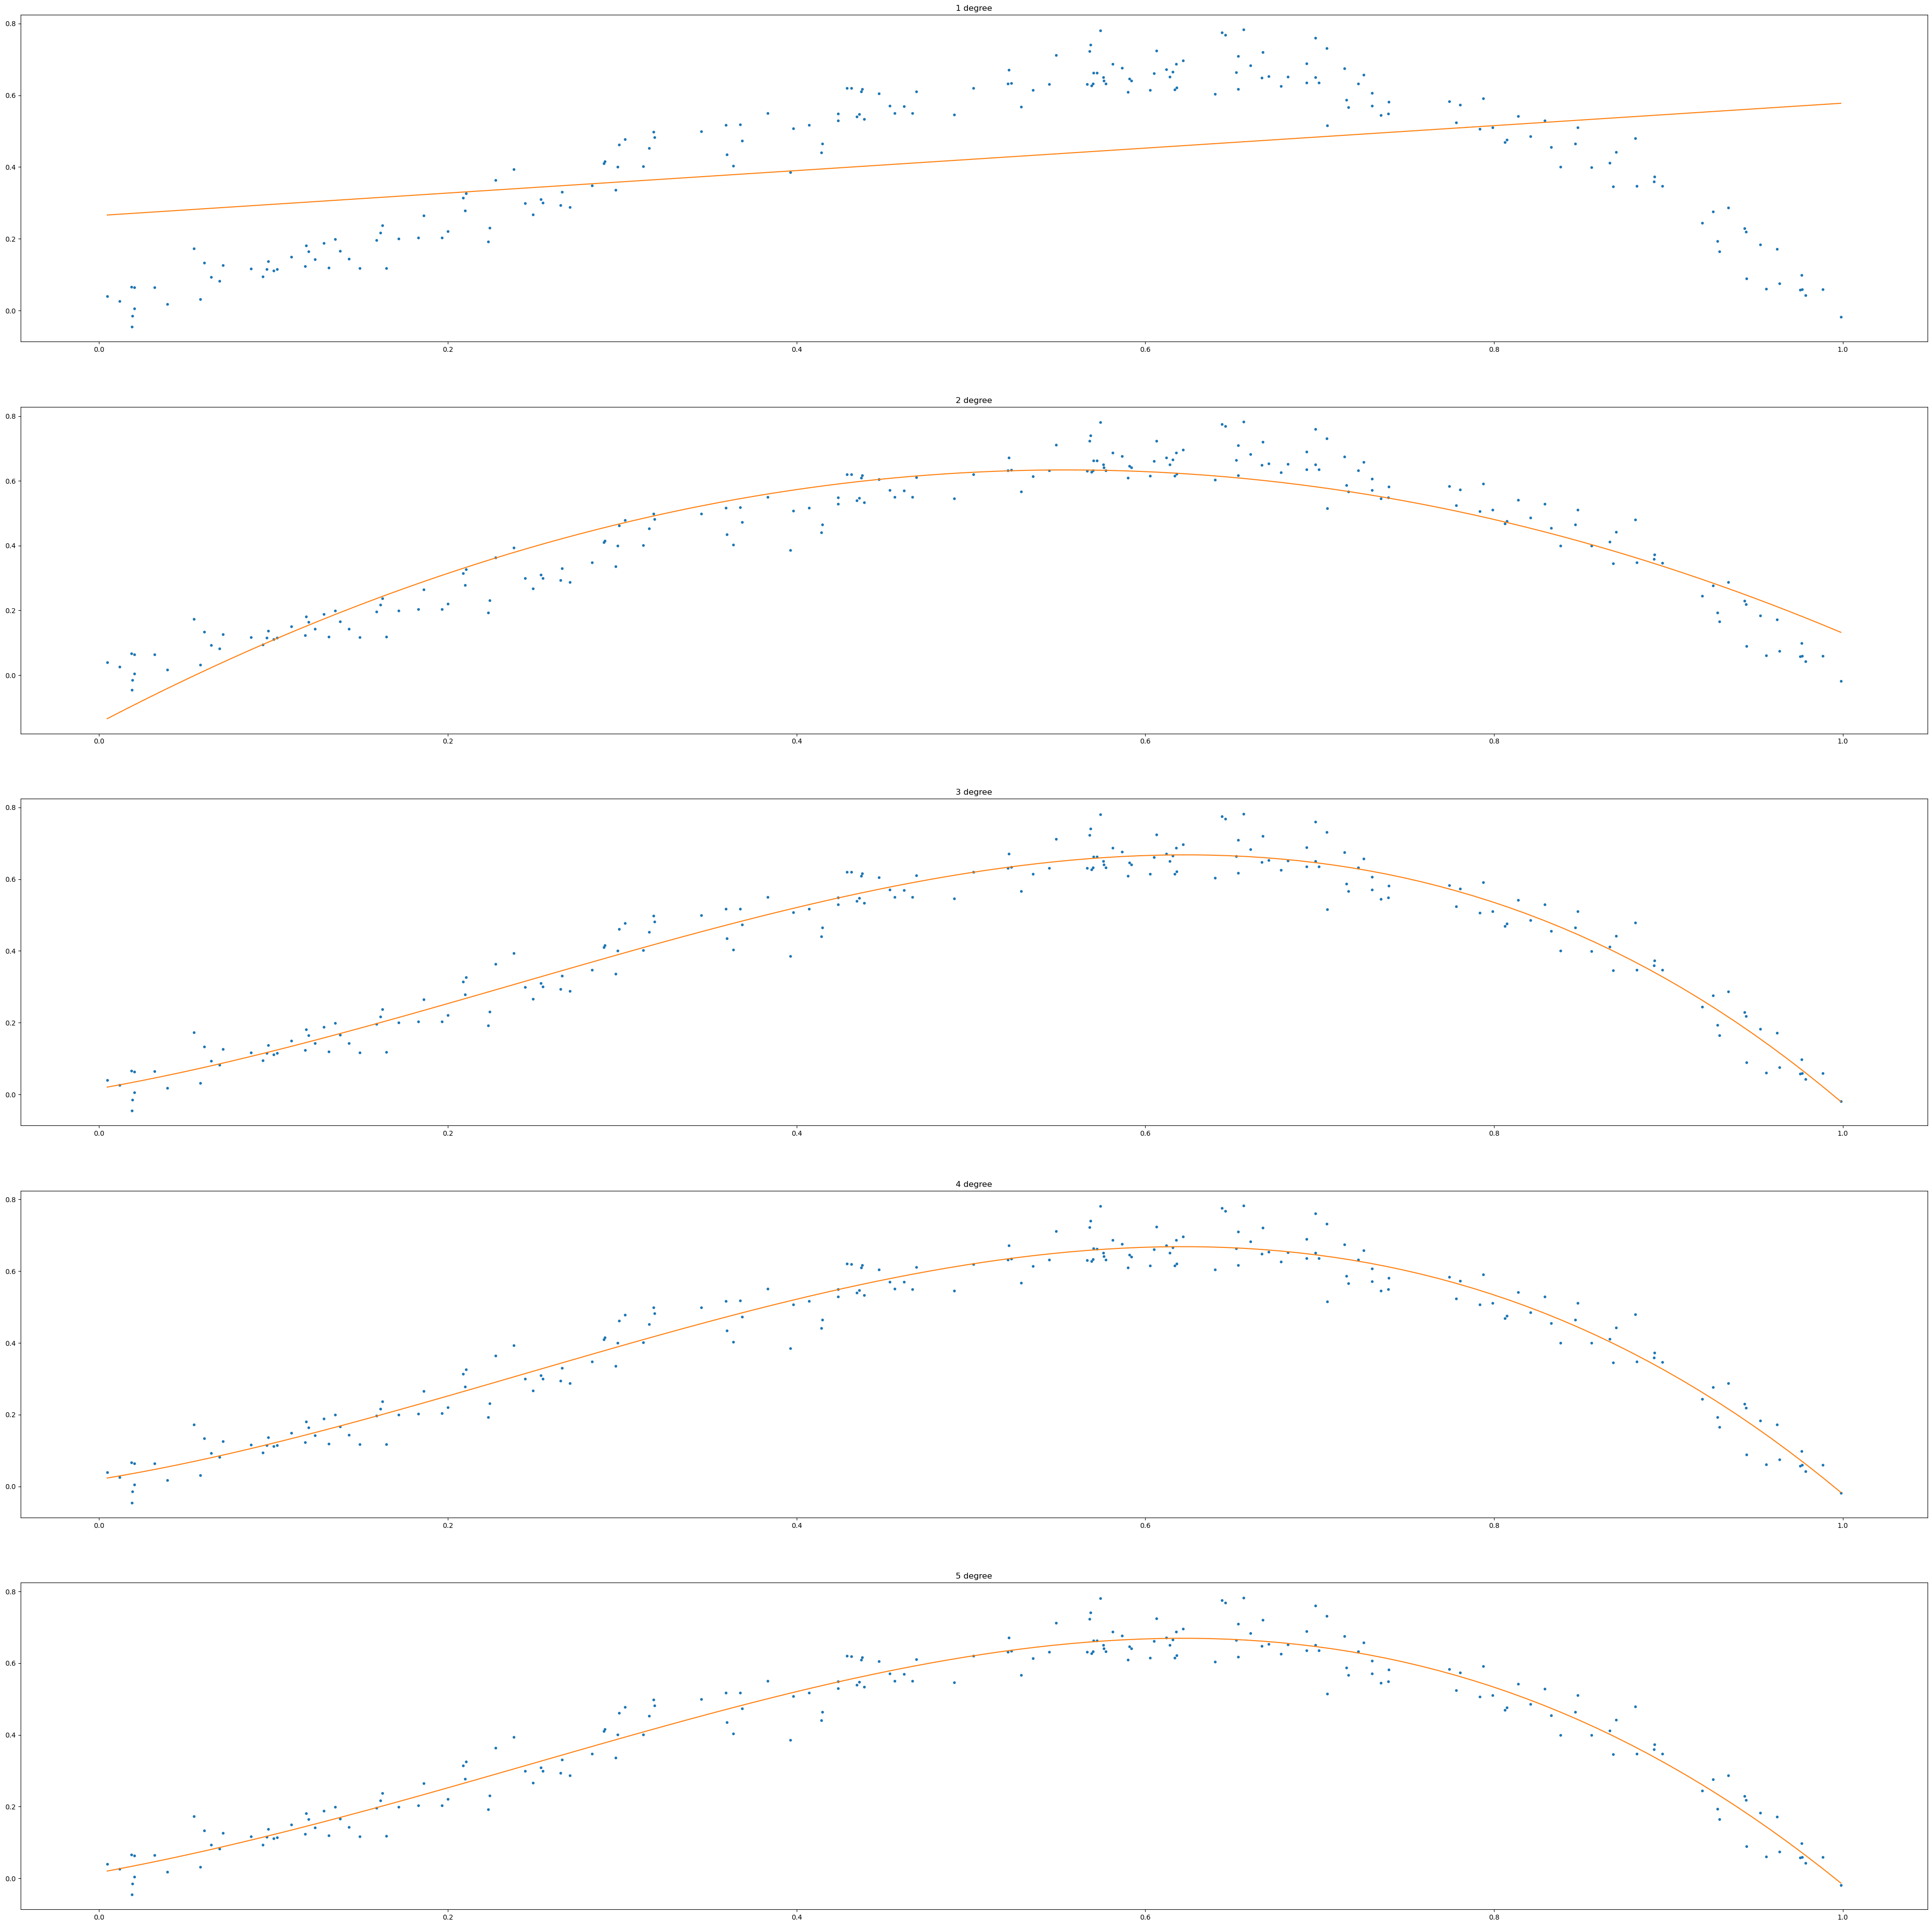

In [168]:
# I would like to watch in different ax

fig, ax = plt.subplots(5,1,figsize = (50,50))

for i in np.arange(N):
    ax[i].plot(x,y,".")
    ax[i].plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))
    ax[i].set_title(f"{i+1} degree")

# from 3 degree, there seems no improvement.

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [166]:
training_errors = []
y_preds = []
# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

for i in np.arange(N):
    y_pred = np.dot(xhats[i].T, thetas[i])
    y_preds.append(y_pred)
    error = sum((y_pred-y)**2)
    training_errors.append(error)
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [8.379829750523797, 1.1720563509609043, 0.4538668778391872, 0.45363076307205424, 0.4534155108625166]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

In [113]:
np.argmin(training_errors)+1

5

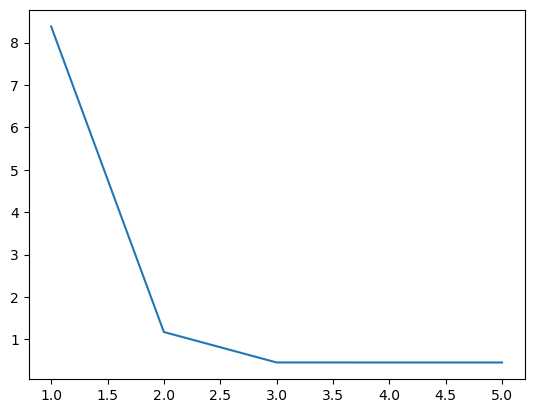

In [117]:
plt.plot(np.arange(N)+1,training_errors)

### ANSWERS

(1) so 5 degree polynomial has the best training error.

(2) because the more parameters, the more complex the model got, which enable model fit to train data better. 

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

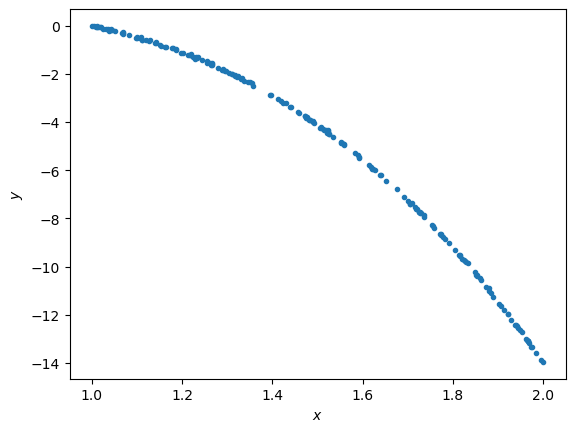

In [124]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x + 2*x**2 - 3*x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [128]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

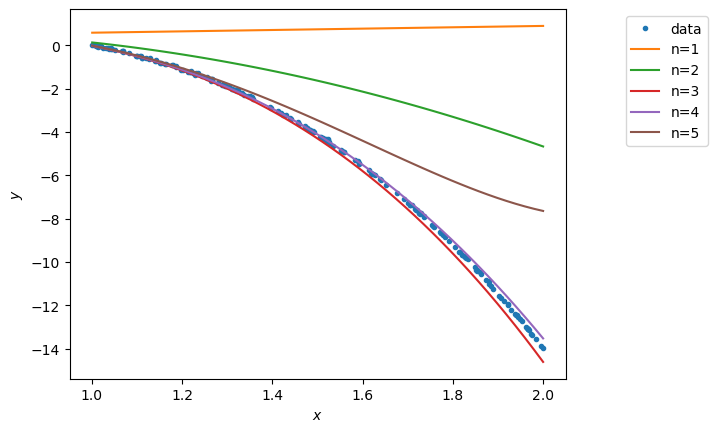

In [130]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [134]:
testing_errors = []
ts_preds = []
# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in np.arange(N):
    ts_pred = np.dot(xhats[i].T, thetas[i])
    ts_preds.append(ts_pred)
    error = sum((ts_pred-y)**2)
    testing_errors.append(error)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [10319.186875427675, 3577.5359809327256, 17.136274353490656, 5.249851372066092, 1087.6760224133318]


### QUESTIONS

(1) What polynomial has the best testing error? 

(2) Why polynomial models of orders 5 does not generalize well?

In [138]:
np.argmin(testing_errors)+1

4

plt.plot(np.arange(N)+1, testing_errors)

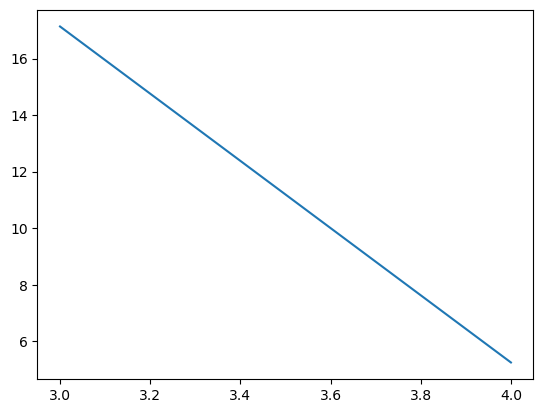

In [146]:
plt.plot(np.array([3,4]),testing_errors[2:4])

### ANSWERS

(1) 4 degree polynomial has the best testing error.

(2) because overfitting happens, which leads to variance. Therfore, parameter of degree 5 polynomial is too well fitted to training data. 

# we have to check train MSE and Test MSE (in this case, it is called error so I calculatd error though). If Test MSE << Train MSE, the overfitting. If both train MSE and test MSE is too small, then underfitting.